## Import Data

In [25]:
SMALLEST_DS_SIZE = 100

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid")
import glob
import os

import random

# userAcceleration data
# float S8g = 4096.0;
# NewAcceleration = userAcceleration/S8g ;  
# unit = g

# rotationRate data (speed of rotation)
# float RFS2000 = 16.4;
# NewRotationRate = rotationRate/RFS2000 ;  
# unit = deg/s

# attitude "oriantation" (angle of rotation) 
# unit = deg

# gravity ( gravitional force on sensor axis)
# float S8g = 4096.0;
# NewGravity = gravity/S8g ;  
# unit = g

# Get data file names
START_T_COUNT = 0
START_F_COUNT = 500

path = r'D:\_1_Technicals\DataScience_Bootcamp\Final_project\Flutter_ArduinoConnect\00_DataSets'
filenames = glob.glob(path + "/**/*.csv")

# shuffeling the files as its always ordered alphabetic
random.seed(10)
shuffled_filenames = random.sample(filenames, len(filenames))


dfs = []
num_t = START_T_COUNT
num_f = START_F_COUNT
for filename in shuffled_filenames:
   
    df = pd.read_csv(filename, index_col=False)
    df.columns= ["time","rotR_x","rotR_y","rotR_z","acc_x","acc_y","acc_z","or_x","or_y","or_z","grav_x","grav_y","grav_z"]
    df.acc_x = df.acc_x/4096.0
    df.acc_y = df.acc_y/4096.0
    df.acc_z = df.acc_z/4096.0
    
    df.rotR_x = df.rotR_x/(16.4*100)
    df.rotR_y = df.rotR_y/(16.4*100)
    df.rotR_z = df.rotR_z/(16.4*100)
    
    df.grav_x = df.grav_x/4096.0
    df.grav_y = df.grav_y/4096.0
    df.grav_z = df.grav_z/4096.0
    
    df.or_x = df.or_x/100
    df.or_y = df.or_y/100
    df.or_z = df.or_z/100
    
    _, tail = os.path.split(filename)
    df["action"] = str(tail).split(".")[0]
    

    if df.action.str.startswith("t_").sum():
        df["label"] = 1
        df["action_num"] = num_t # 0 - 499
        num_t += 1
    else:
        df["label"] = 0
        df["action_num"] = num_f # 500 - 1000
        num_f += 1
    
    df = df.drop(columns="time").reset_index().rename(columns={"index":"time"})
    dfs.append(df)
df_all = pd.concat(dfs,axis=0).set_index("time")

In [27]:
dfs[0].describe()

,time,rotR_x,rotR_y,rotR_z,acc_x,acc_y,acc_z,or_x,or_y,or_z,grav_x,grav_y,grav_z,label,action_num
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.0,539.0
mean,269.000000,0.015534,-0.006069,0.000913,0.019712,-0.008395,0.011639,-0.170464,0.423748,0.548776,-0.275488,-0.605757,0.445555,1.0,0.0
std,155.740168,0.441466,0.334659,0.333863,0.065603,0.076440,0.063460,0.205463,0.419638,0.328680,0.329519,0.465503,0.183296,0.0,0.0
min,0.000000,-1.939024,-1.079878,-1.617073,-0.211182,-0.331787,-0.249756,-0.550000,-0.880000,0.200000,-0.823486,-0.985596,0.014160,1.0,0.0
25%,134.500000,-0.135061,-0.073780,-0.094512,-0.011230,-0.047852,-0.018677,-0.290000,0.400000,0.350000,-0.491699,-0.895386,0.366821,1.0,0.0
50%,269.000000,0.019512,0.000000,-0.007317,0.011963,-0.007812,0.009033,-0.160000,0.600000,0.390000,-0.288574,-0.788330,0.434326,1.0,0.0
75%,403.500000,0.205793,0.084146,0.078659,0.043335,0.030884,0.039917,0.000000,0.650000,0.755000,0.002075,-0.574463,0.556641,1.0,0.0
max,538.000000,1.743902,1.559146,1.279268,0.280273,0.451660,0.371338,0.150000,0.880000,1.500000,0.271240,0.664795,0.934326,1.0,0.0


In [28]:
len(filenames)

185

In [29]:
num_t

87

In [30]:
num_f

598

In [31]:
df_all.shape

(71082, 15)

In [32]:
df_all

,rotR_x,rotR_y,rotR_z,acc_x,acc_y,acc_z,or_x,or_y,or_z,grav_x,grav_y,grav_z,action,label,action_num
time,,,,,,,,,,,,,,,
0,-0.120122,0.052439,0.011585,0.098145,0.047607,0.029785,0.15,0.13,0.80,0.271240,-0.230225,0.934326,t_stand_left_DrinkBottle_10ml_1s_right,1,0
1,-0.237805,0.171951,0.036585,0.093994,0.043213,0.041748,0.15,0.14,0.80,0.259766,-0.249023,0.932861,t_stand_left_DrinkBottle_10ml_1s_right,1,0
2,-0.279268,0.214024,0.028049,0.099121,0.081543,0.036377,0.14,0.15,0.80,0.246094,-0.265869,0.931885,t_stand_left_DrinkBottle_10ml_1s_right,1,0
3,-0.643293,0.204268,0.090854,0.108398,0.070312,0.013916,0.12,0.19,0.80,0.219238,-0.322998,0.920410,t_stand_left_DrinkBottle_10ml_1s_right,1,0
4,-1.070732,0.196341,0.144512,0.096680,0.083252,-0.019775,0.11,0.24,0.81,0.195801,-0.404785,0.892822,t_stand_left_DrinkBottle_10ml_1s_right,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,0.032927,-0.010366,-0.041463,-0.000732,0.063965,0.010254,0.63,0.60,3.42,0.904785,-0.377686,0.196045,t_stand_hold_DrinkCup_10ml_1s_right,1,86
240,-0.079268,0.004878,-0.066463,-0.007812,0.024170,0.018066,0.63,0.60,3.42,0.906250,-0.374268,0.196045,t_stand_hold_DrinkCup_10ml_1s_right,1,86
241,-0.051220,-0.013415,-0.078659,0.006836,0.008057,0.009521,0.63,0.60,3.43,0.907227,-0.372070,0.194824,t_stand_hold_DrinkCup_10ml_1s_right,1,86


In [33]:
df_all.describe()

,rotR_x,rotR_y,rotR_z,acc_x,acc_y,acc_z,or_x,or_y,or_z,grav_x,grav_y,grav_z,label,action_num
count,71082.000000,71082.000000,71082.000000,71082.000000,71082.000000,71082.000000,71082.000000,71082.000000,71082.000000,71082.000000,71082.000000,71082.000000,71082.000000,71082.000000
mean,-0.001034,-0.000051,-0.000806,0.017361,0.001630,0.001820,-0.097270,0.518277,1.572731,-0.161966,-0.543697,0.332035,0.487254,302.094370
std,0.494194,0.304018,0.344566,0.077409,0.099037,0.074350,0.272389,0.534142,1.045023,0.422603,0.417447,0.463170,0.499841,255.407921
min,-10.221951,-3.263415,-2.895732,-0.916748,-2.086914,-1.875244,-0.790000,-1.790000,0.000000,-0.982910,-0.999756,-0.965576,0.000000,0.000000
25%,-0.134756,-0.067073,-0.084756,-0.010986,-0.032715,-0.021973,-0.300000,0.280000,0.660000,-0.500000,-0.840576,0.000000,0.000000,42.000000
50%,0.001220,0.002439,-0.002439,0.007812,0.002197,0.003418,-0.080000,0.530000,1.320000,-0.146484,-0.675781,0.465576,0.000000,504.000000
75%,0.140244,0.072561,0.070122,0.042236,0.034668,0.031250,0.060000,0.860000,2.450000,0.109619,-0.376465,0.698242,1.000000,551.000000
max,5.950000,3.003049,2.873780,3.119141,1.618164,1.549561,0.840000,1.790000,3.590000,0.995117,0.999756,0.999756,1.000000,597.000000


In [34]:
(df_all.label == 1).sum()

34635

## Missig Data

In [35]:
pd.isna(df_all).sum()

rotR_x        0
rotR_y        0
rotR_z        0
acc_x         0
acc_y         0
acc_z         0
or_x          0
or_y          0
or_z          0
grav_x        0
grav_y        0
grav_z        0
action        0
label         0
action_num    0
dtype: int64

##  Class Balance

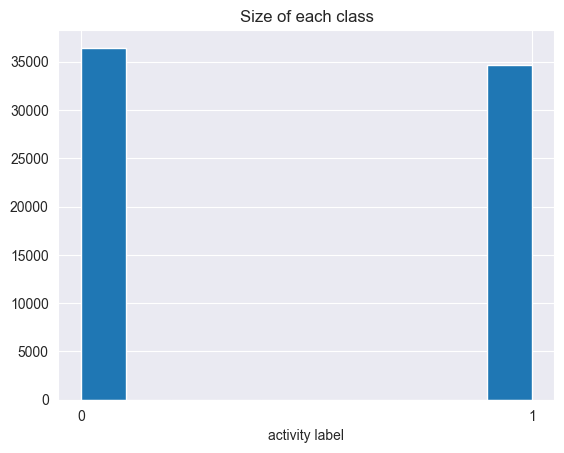

In [36]:
plt.title('Size of each class')
plt.xlabel('activity label')
plt.hist(df_all.label,rwidth=1)
plt.xticks([0,1]);

In [37]:
(df_all.action_num.unique())

array([  0, 500,   1,   2,   3, 501,   4,   5,   6, 502, 503,   7, 504,
         8, 505, 506, 507, 508, 509, 510,   9,  10,  11, 511, 512, 513,
       514, 515,  12,  13, 516, 517,  14,  15, 518,  16, 519, 520, 521,
       522,  17,  18, 523,  19, 524,  20, 525,  21,  22,  23, 526, 527,
        24,  25, 528,  26,  27, 529, 530, 531,  28, 532,  29, 533,  30,
       534, 535, 536, 537, 538,  31,  32,  33, 539,  34, 540, 541, 542,
       543, 544, 545, 546,  35,  36, 547,  37,  38,  39, 548, 549, 550,
       551, 552, 553, 554,  40, 555,  41, 556,  42, 557, 558, 559,  43,
       560, 561, 562,  44, 563, 564, 565,  45,  46,  47,  48,  49,  50,
        51, 566,  52, 567,  53,  54, 568, 569, 570, 571, 572,  55, 573,
        56, 574, 575,  57,  58,  59, 576,  60, 577,  61, 578,  62, 579,
       580,  63, 581,  64, 582, 583, 584,  65,  66, 585, 586, 587,  67,
        68,  69,  70,  71, 588,  72, 589, 590,  73,  74,  75,  76,  77,
       591, 592, 593, 594,  78,  79,  80,  81,  82,  83, 595,  8

<Figure size 640x480 with 0 Axes>

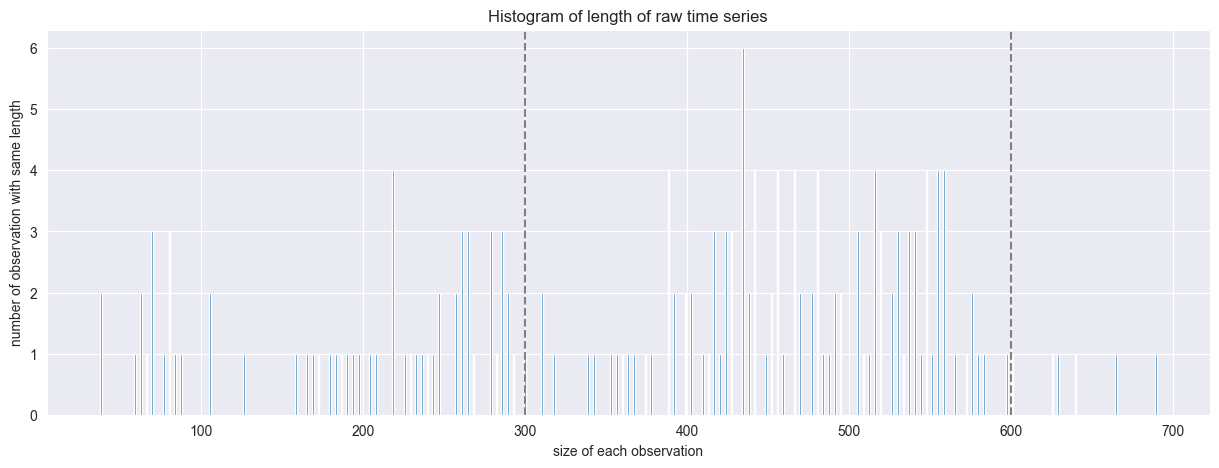

In [38]:
### Length of time series
action_num_list = df_all.action_num.unique()
series_length = list()
for act in action_num_list:
    series_length.append(df_all[(df_all.action_num == act)].shape[0])
plt.figure(2)
plt.figure(figsize=(15,5))
plt.title('Histogram of length of raw time series')
plt.hist(series_length,bins=len(action_num_list),rwidth=0.3,align='left');
#plt.xlim(0,350)
plt.xlabel("size of each observation")
plt.ylabel("number of observation with same length")
plt.axvline(300, color="grey",linestyle="dashed")
plt.axvline(600, color="grey",linestyle="dashed");

In [39]:
# There is too small and too large datasets
# lets analyze which is which
action_num_list = df_all.action_num.unique()
each_series_length = list()
for act_num in action_num_list:
    each_series_length.append((df_all[(df_all.action_num == act_num)].shape[0],act_num))
each_series_length.sort()

### Analyze Smallest DSs

In [40]:
#check the largest dataset
dataset_name = df_all[df_all.action_num == each_series_length[-1][1]].action.unique()[0]
print(f"The largest dataset size is {each_series_length[-1][0]} records with name: {dataset_name}")

The largest dataset size is 693 records with name: f_sit_hold_LookMobile_2sec_front


In [41]:
small_tests=[]
for test in each_series_length:
    if test[0] < SMALLEST_DS_SIZE:
        small_tests.append(test[1])

In [42]:
small_tests

[521, 501, 566, 565, 507, 500, 584, 530, 545, 553, 84, 563, 540, 510, 45]

In [43]:
#check which testcases are these
for small_dataset in small_tests:
    print(df_all[df_all.action_num == small_dataset].action.unique())

['f_sit_front_EatFood_2sec_right']
['f_sit_hold_EatFood_2sec_hold']
['f_stand_hold_LookMobile_2sec_hold']
['f_sit_hold_LookMobile_2sec_hold']
['f_stand_hold_LookMobile_2sec_front']
['f_sit_right_EatFood_2sec_right']
['f_sit_hold_EatFood_2sec_front']
['f_sit_hold_EatFood_2sec_left']
['f_stand_hold_LookMobile_2sec_left']
['f_stand_hold_LookMobile_2sec_right']
['t_sit_front_DrinkBottle_10ml_1s_front']
['f_sit_front_EatFood_2sec_front']
['f_stand_front_LookMobile_2sec_hold']
['f_stand_front_EatFood_2sec_left']
['t_stand_hold_DrinkCup_10ml_1s_front']


In [44]:
# drop the smallest datasets
for small_dataset in small_tests:
    df_all = df_all[(df_all.action_num != small_dataset)]

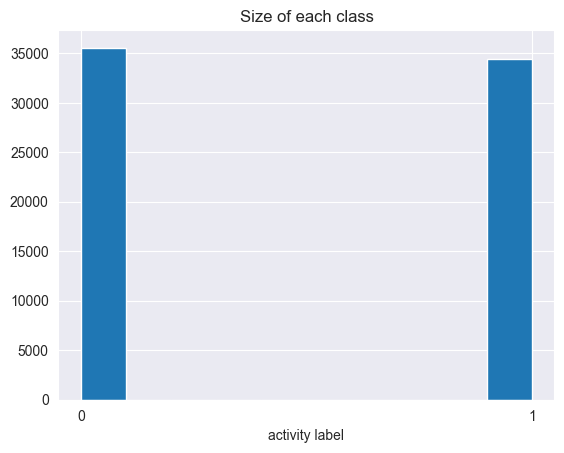

In [45]:
plt.title('Size of each class')
plt.xlabel('activity label')
plt.hist(df_all.label,rwidth=1)
plt.xticks([0,1]);

<Figure size 640x480 with 0 Axes>

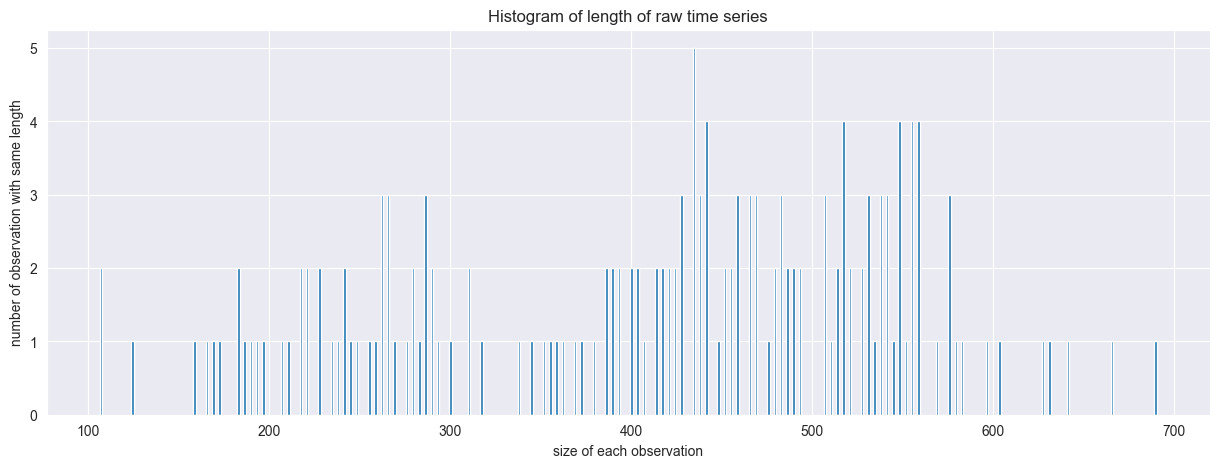

In [46]:
### Length of time series
action_num_list = df_all.action_num.unique()
series_length = list()
for act in action_num_list:
    series_length.append(df_all[(df_all.action_num == act)].shape[0])
plt.figure(2)
plt.figure(figsize=(15,5))
plt.title('Histogram of length of raw time series')
plt.hist(series_length,bins=len(action_num_list),rwidth=0.4,align='left');
#plt.xlim(0,350)
plt.xlabel("size of each observation")
plt.ylabel("number of observation with same length");

### Conclusion

From above analysis

1. This dataset raised concern on class imbalance. --> make sure to consider same number of  f and t dataset 
2. The distribution of time-series length is broad. --> average dataset size should be around 200 - 300 (4sec to 6sec)

## Export Data

In [47]:
df_all.to_pickle("merged_df.pkl")